# **주요 내용**

*   TA, FA, TAR, FAR, EER 계산
*   Embedding Visualization

In [1]:
notebookName = "20200528"
notebookName

'20200528'

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1672617763962818130, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15508417364250615597
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6146651315998792916
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2596765174025712985
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [4]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [5]:
!nvidia-smi

Wed May 27 15:51:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Unzip & Format Change**

In [7]:
import os

pcm_path = "./pcm_dataset"
wav_path = "./wav_dataset"

# mkdir
if not os.path.exists(pcm_path): os.mkdir(pcm_path)
if not os.path.exists(wav_path): os.mkdir(wav_path)

# unsip
!unzip -q "/content/drive/My Drive/ETRI/9_voice_download_4_Korean_English_by_Korean_part2.zip" -d "./pcm_dataset"

print(os.listdir(pcm_path)[:5])
print(len(os.listdir(pcm_path)))

['GSF03031LJH0', 'I4F02631KSM0', 'I4F05625JSY0', 'I4F03922LKY0', 'GSF09025WYY0']
50


In [8]:
import wave

for i, folder_path in enumerate(sorted(os.listdir(pcm_path))):
    print("{}\t{}".format(i, folder_path))

    file_list = os.listdir(os.path.join(pcm_path, folder_path)) # label's path
    file_list_pcm = [files for files in file_list if files.endswith(".pcm")] # *.pcm files

    for j, file_path in enumerate(sorted(file_list_pcm)):
        with open(os.path.join(pcm_path, folder_path, file_path), "rb") as pcm_file:
            pcm_data = pcm_file.read()
        # save as {label}_{features}.wav format
        with wave.open(os.path.join(wav_path, "{}_{}.wav".format(i, j)), 'wb') as wav_file:
            wav_file.setparams((1, 2, 16000, 0, 'NONE', 'NONE')) # 16kHz, mono channel
            wav_file.writeframes(pcm_data)

0	GSF03031LJH0
1	GSF03732JJH0
2	GSF04122LHK0
3	GSF04524CJI0
4	GSF04623LWJ0
5	GSF04923PEY0
6	GSF05134JHK0
7	GSF05432KSY0
8	GSF05733HBH0
9	GSF05844LJR0
10	GSF06654KES0
11	GSF06742CKA0
12	GSF06833JYK0
13	GSF06934SYN0
14	GSF07132LCY0
15	GSF08142LDH0
16	GSF08233NEH0
17	GSF08333KJH0
18	GSF09025WYY0
19	GSF09431SHY0
20	GSF09844KKS0
21	GSM02434AGS0
22	GSM02544LHS0
23	GSM03224CHD0
24	GSM03321SDK0
25	GSM03634SJY0
26	GSM03823YJK0
27	GSM04233KMS0
28	GSM04424JBRC
29	GSM05953CJH0
30	GSM06044JBY0
31	GSM06235BJH0
32	GSM07042NSK0
33	GSM07355MIW0
34	GSM09534JHD0
35	GSM09644KCK0
36	GSM09752SCY0
37	I4F02224SDY0
38	I4F02631KSM0
39	I4F02821YRR0
40	I4F02933JSI0
41	I4F03423KSR0
42	I4F03543KSY0
43	I4F03922LKY0
44	I4F04732OIY0
45	I4F05332CJH0
46	I4F05625JSY0
47	I4F07443LJA0
48	I4F07633JSI0
49	I4F07852PKJ0


In [0]:
import numpy as np

num_labels = 50
num_features = 100
data_length = 3 ** 9

train_rate = 0.8
num_train_data = int(num_features * train_rate) # 80

select_train_data = [True] * num_train_data + [False] * (num_features - num_train_data)
select_test_data = [False] * num_train_data + [True] * (num_features - num_train_data)

## **Split Train Data, Test Data**

In [10]:
from scipy.io import wavfile

data = np.zeros((num_labels * num_features, data_length))
labels = np.zeros((num_labels * num_features))

for i in range(num_labels):
    for j in range(num_features):
        file_name = "{}_{}.wav".format(i, j)
        sample_rate, samples = wavfile.read(os.path.join(wav_path, file_name))
        
        start = int(len(samples) - data_length) // 2
        end = start + data_length
        
        data[i * num_features + j] = samples[start:end]
        labels[i * num_features + j] = i

train_data = data[select_train_data * num_labels]
train_labels = labels[select_train_data * num_labels]

test_data = data[select_test_data * num_labels]
test_labels = labels[select_test_data * num_labels]

# save *.npy        
np.save("./train_data", train_data)
np.save("./train_labels", train_labels)

np.save("./test_data", test_data)
np.save("./test_labels", test_labels)

print("train_data.shape: {}, train_labels.shape: {}".format(train_data.shape, train_labels.shape))
print("test_data.shape: {}, test_labels.shape: {}".format(test_data.shape, test_labels.shape))

train_data.shape: (4000, 19683), train_labels.shape: (4000,)
test_data.shape: (1000, 19683), test_labels.shape: (1000,)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data[:, :, np.newaxis], train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data[:, :, np.newaxis], test_labels))

train_dataset = train_dataset.shuffle(buffer_size = data_length * 128 * 10).batch(128)
test_dataset = test_dataset.batch(128)

In [12]:
train_dataset

<BatchDataset shapes: ((None, 19683, 1), (None,)), types: (tf.float64, tf.float64)>

## **Build Model**

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

model_input = Input(shape = (data_length, 1))

x = layers.Conv1D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(model_input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size = 3)(x)

x = layers.Conv1D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size = 3)(x)

x = layers.Conv1D(filters = 128, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size = 3)(x)

x = layers.Conv1D(filters = 256, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size = 3)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(256, activation = None)(x)  # Not softmax
out = layers.Lambda(lambda x: tf.math.l2_normalize(x, axis = 1))(x) # L2 normalize embeddings

model = Model(model_input, out)

In [241]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19683, 1)]        0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 19683, 32)         192       
_________________________________________________________________
batch_normalization_20 (Batc (None, 19683, 32)         128       
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 6561, 32)          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 6561, 64)          10304     
_________________________________________________________________
batch_normalization_21 (Batc (None, 6561, 64)          256       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 2187, 64)          0     

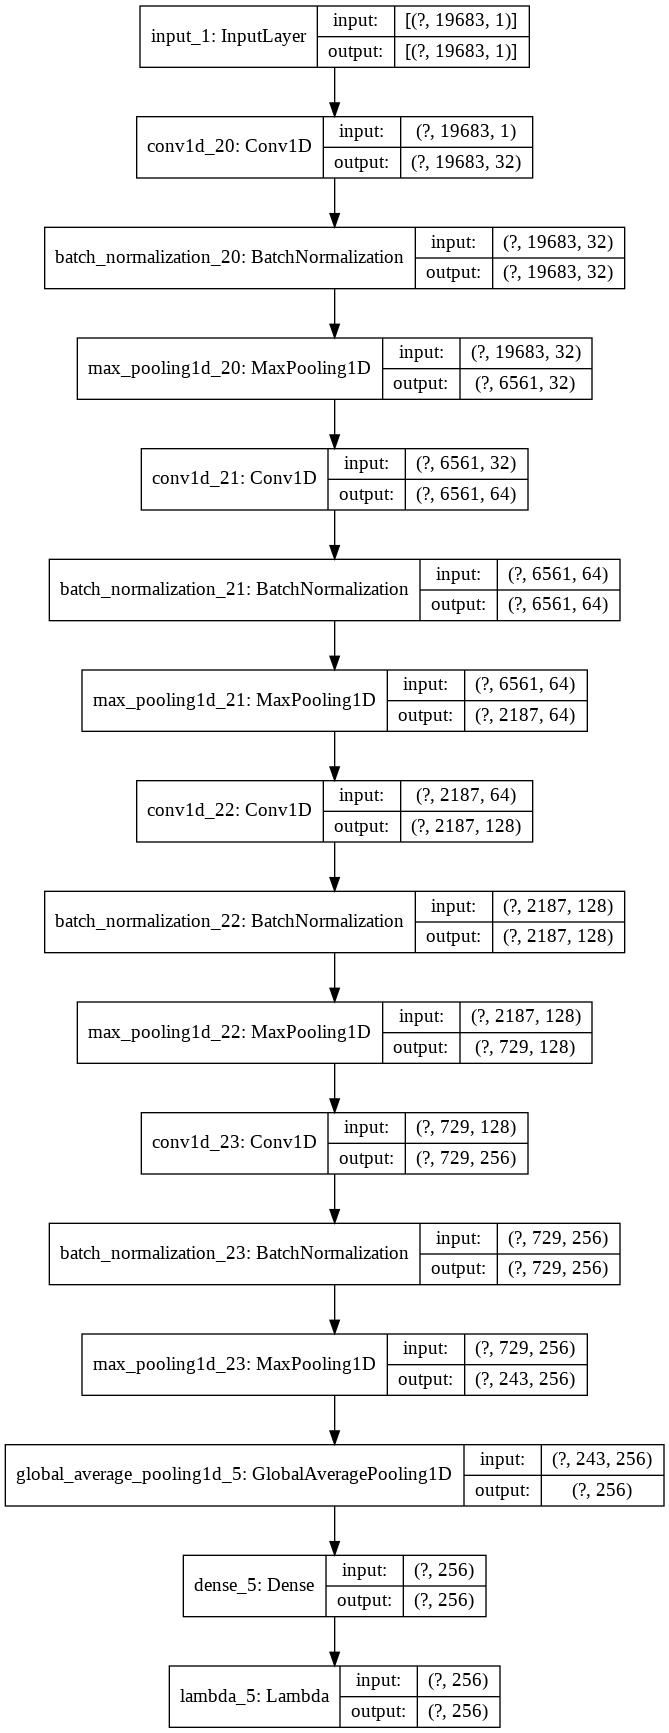

In [242]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'model.png')

## **Train model**

In [0]:
import tensorflow_addons as tfa

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = tfa.losses.TripletSemiHardLoss())

In [244]:
# callback
def scheduler(epoch, lr):
    if not epoch:
        return lr
    return 0.3 * lr if not (epoch % 50) else lr

# Train the network
history = model.fit(
    train_dataset,
    verbose = 1,
    epochs = 100,
    callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)])

Epoch 1/100
32/32 [==============================] - 4s 138ms/step - loss: 0.9304 - lr: 0.0100
Epoch 2/100
32/32 [==============================] - 4s 138ms/step - loss: 0.8594 - lr: 0.0100
Epoch 3/100
32/32 [==============================] - 4s 138ms/step - loss: 0.7863 - lr: 0.0100
Epoch 4/100
32/32 [==============================] - 4s 138ms/step - loss: 0.7343 - lr: 0.0100
Epoch 5/100
32/32 [==============================] - 4s 138ms/step - loss: 0.6815 - lr: 0.0100
Epoch 6/100
32/32 [==============================] - 4s 138ms/step - loss: 0.6312 - lr: 0.0100
Epoch 7/100
32/32 [==============================] - 4s 138ms/step - loss: 0.5424 - lr: 0.0100
Epoch 8/100
32/32 [==============================] - 4s 138ms/step - loss: 0.4980 - lr: 0.0100
Epoch 9/100
32/32 [==============================] - 4s 138ms/step - loss: 0.4516 - lr: 0.0100
Epoch 10/100
32/32 [==============================] - 4s 138ms/step - loss: 0.4270 - lr: 0.0100
Epoch 11/100
32/32 [=============================

In [245]:
history.history.keys()

dict_keys(['loss', 'lr'])

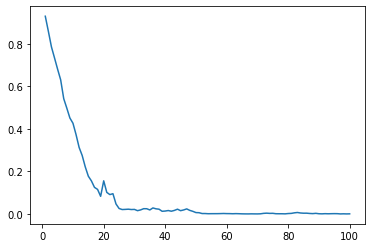

In [247]:
from matplotlib import pyplot as plt
plt.plot(np.arange(1, 100 + 1, 1), history.history['loss'])

## **Calculate Performance Evaluation Metrics**
*   True Positive Rate (TPR)
*   False Positive Rate (FPR)
*   Equal Error Rate (EER)

In [0]:
train_pred = model.predict(train_dataset)
# train_true = train_labels
test_pred = model.predict(test_dataset)
# test_true = test_labels

In [0]:
import itertools

true_accept = np.zeros((0), dtype = float)
false_accept = np.zeros((0), dtype = float)

for i in range(num_labels):
    same_class = train_pred[np.where(train_labels == i)]
    diff_class = train_pred[np.where(train_labels != i)]

    partial_true_accept = tf.norm([i[0] - i[1] for i in np.array(list(itertools.permutations(same_class, 2)))], axis = -1)
    partial_false_accept = tf.norm([i - j for i in same_class for j in diff_class], axis = -1)

    true_accept = np.concatenate([true_accept, partial_true_accept.numpy()], axis = None)
    false_accept = np.concatenate([false_accept, partial_false_accept.numpy()], axis = None)

In [160]:
print("true_accept.shape: {}".format(true_accept.shape))    # (80 C 2) * 50 = 316,000
print("false_accept.shape: {}".format(false_accept.shape)) # (80 * 3920) * 50 = 15,680,000

true_accept.shape: (316000,)
false_accept.shape: (15680000,)


In [0]:
tpr = np.zeros((10 ** 4), dtype = float)
fpr = np.zeros((10 ** 4), dtype = float)

total_results = np.concatenate([true_accept, false_accept], axis = None)

# Strictly, below comparisons can be performed with all possible d values in total_results.
# E.g. for i, d in enumerate(np.sort(np.concatenate([true_accept, false_accept], axis = None))):
for i, d in enumerate(np.linspace(np.min(total_results), np.max(total_results), 10 ** 4)):    
    tpr[i] = np.where(true_accept <= d)[0].shape[0]
    fpr[i] = np.where(false_accept <= d)[0].shape[0]

In [0]:
tpr = tpr / len(true_accept)
fpr = fpr / len(false_accept)

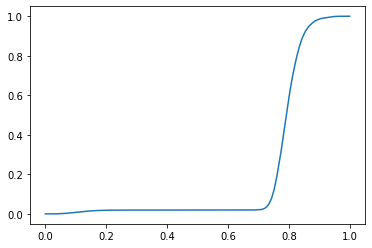

In [168]:
# Trade-off of tpr-threshold and fpr-threshold.
plt.plot(np.linspace(0, 1, 10 ** 4), tpr)

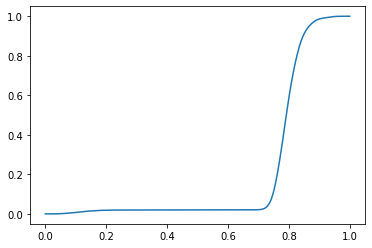

In [169]:
plt.plot(np.linspace(0, 1, 10 ** 4), fpr)

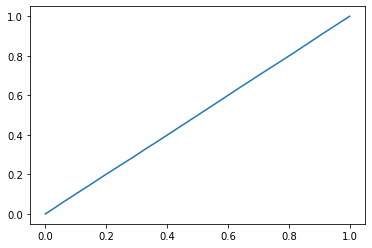

In [178]:
plt.plot(fpr, tpr)

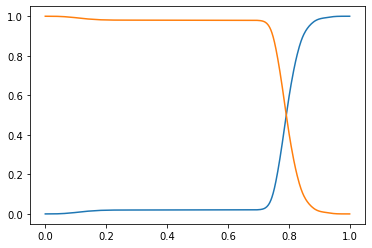

In [177]:
plt.plot(np.linspace(0, 1, 10 ** 4), fpr)
plt.plot(np.linspace(0, 1, 10 ** 4), 1 - fpr)

In [173]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d

eer = brentq(lambda x: 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print("Equal Error Rate: {:.4f}".format(eer))

ValueError: ignored

## **Embedding Visualization with t-Stochastic Neighbor Embedding (t-SNE)**

*   https://lovit.github.io/nlp/representation/2018/09/28/tsne/
*   https://lovit.github.io/nlp/representation/2018/09/28/tsne/


In [0]:
import numpy as np

# n_data_per_class = num_features - num_train_data
n_data_per_class = num_train_data
n_classes = num_labels

# x = model.predict(test_dataset)
# y = test_labels

x = model.predict(train_dataset)
y = train_labels

In [232]:
x.shape

(4000, 256)

In [233]:
y.shape

(4000,)

In [234]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import export_png
from bokeh.colors import RGB

output_notebook()

title = '{} classes {} points'.format(n_classes, n_classes * n_data_per_class)

def draw_figure(x, y, title, show_figure=True):
    # colors = 'firebrick darksalmon lightslategray darkslateblue forestgreen'.split()):

    p = figure(width=400, height=400, title=title)
    for c in range(n_classes):
        idx = np.where(y == c)[0]
        x_ = x[idx]
        c = RGB(
            np.random.randint(0, 256),
            np.random.randint(0, 256),
            np.random.randint(0, 256)
        )
        p.scatter(x_[:,0], x_[:,1], fill_color = c, line_color = c)
    if show_figure:
        show(p)
    return p

p = draw_figure(x, y, title)

In [213]:
# Predict train_set
from sklearn.manifold import TSNE

plots = []
for perplexity in [2, 5, 10, 30, 100, 200, 500, 1000]:
    z = TSNE(
        n_components = 2,
        perplexity = perplexity
    ).fit_transform(model.predict(train_dataset))
    title = 't-SNE with perplexity = {}'.format(perplexity)
    plots.append(draw_figure(z, train_labels, title, show_figure = False))

gp = gridplot([
               [plots[0], plots[1]],
               [plots[2], plots[3]], 
               [plots[4], plots[5]],
               [plots[6], plots[7]]])
show(gp)

In [188]:
# Predict test_set
plots = []
for perplexity in [2, 5, 10, 30, 100, 200, 500, 1000]:
    z = TSNE(
        n_components = 2,
        perplexity = perplexity
    ).fit_transform(x)
    title = 't-SNE with perplexity = {}'.format(perplexity)
    plots.append(draw_figure(z, y, title, show_figure = False))

gp = gridplot([
               [plots[0], plots[1]],
               [plots[2], plots[3]], 
               [plots[4], plots[5]],
               [plots[6], plots[7]]])
show(gp)

## **K-Nearest Neighbor Algorithm**

In [199]:
from sklearn.neighbors import KNeighborsClassifier

x = model.predict(train_dataset)
# x = TSNE(n_components = 2).fit_transform(model.predict(train_dataset))
y = train_labels

classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
classifier.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [200]:
_x = model.predict(test_dataset)
# _x = TSNE(n_components = 2).fit_transform(model.predict(test_dataset))
_y = test_labels

print(classifier.score(_x, _y))

0.019


In [193]:
model.predict(train_dataset).shape

(4000, 256)